In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "F:\Imarticus\PGA18\python works\DrivenData\Flu data"

F:\Imarticus\PGA18\python works\DrivenData\Flu data


In [3]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [4]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [5]:
labels=pd.read_csv("training_set_labels.csv")

In [6]:
print(vaccinetrain.shape)
print(vaccinetest.shape)
print(labels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [7]:
vaccinetrain["id"]="train"
vaccinetest["id"]="test"

In [8]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [9]:
combinedf.isnull().sum().sort_values(ascending=False)

employment_occupation          26896
employment_industry            26605
health_insurance               24502
income_poverty                  8920
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
rent_or_own                     4078
employment_status               2934
marital_status                  2850
education                       2814
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_children               474
household_adults                 474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
b

In [10]:
print(vaccinetest.shape)
print(vaccinetrain.shape)

(26708, 37)
(26707, 37)


In [11]:
# combinedfNew=combinedf.drop(["employment_occupation","employment_industry"],axis=1)

In [12]:
combinedf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,id
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,train
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,train
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,train
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,train
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,train


In [13]:
combinedf.shape

(53415, 37)

In [14]:
for col in combinedf.drop(["respondent_id","id"],axis=1).columns:
    freq=combinedf[col].value_counts(dropna=False)
    print(freq)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
NaN      177
Name: h1n1_concern, dtype: int64
1.0    29227
2.0    19002
0.0     4948
NaN      238
Name: h1n1_knowledge, dtype: int64
0.0    50642
1.0     2623
NaN      150
Name: behavioral_antiviral_meds, dtype: int64
1.0    38564
0.0    14430
NaN      421
Name: behavioral_avoidance, dtype: int64
0.0    49687
1.0     3690
NaN       38
Name: behavioral_face_mask, dtype: int64
1.0    44045
0.0     9288
NaN       82
Name: behavioral_wash_hands, dtype: int64
0.0    34346
1.0    18910
NaN      159
Name: behavioral_large_gatherings, dtype: int64
0.0    35291
1.0    17960
NaN      164
Name: behavioral_outside_home, dtype: int64
1.0    36175
0.0    16984
NaN      256
Name: behavioral_touch_face, dtype: int64
0.0    38221
1.0    10874
NaN     4320
Name: doctor_recc_h1n1, dtype: int64
0.0    32813
1.0    16282
NaN     4320
Name: doctor_recc_seasonal, dtype: int64
0.0    36978
1.0    14534
NaN     1903
Name: chronic_med_condition, dtype: int64
0

In [15]:
# combinedfNew.dtypes

In [16]:
# Missing Value Imputation - KNNImputer
# K Nearest Neighbour is a non parametric algorithm that uses distance calculation like Euclidean to calculated 
# algorith that uses distance missing value 


# For running this imputer on object or categorical data labelencoding must be done before running imputer


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
stringcols=combinedf.drop(["respondent_id","id"],axis=1)

In [19]:
stringcols.shape

(53415, 35)

In [20]:
stringcols=stringcols.astype(str).apply(lambda series:pd.Series(
LabelEncoder().fit_transform(series[series.notnull()]),index=series[series.notnull()].index))

In [21]:
from sklearn.impute import KNNImputer

In [22]:
imputer=KNNImputer()

In [23]:
stringcolsimp=imputer.fit_transform(stringcols)

In [24]:
stringcols.isnull().sum().sort_values(ascending=False)

h1n1_concern                   0
marital_status                 0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
rent_or_own                    0
opinion_seas_vacc_effective    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
opinion_seas_risk              0
opinion_h1n1_sick_from_vacc    0
h1n1_knowledge                 0
behavioral_touch_face          0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
doctor_recc_h1n1               0
opinion_h1n1_risk              0
doctor_recc_seasonal           0
chronic_med_condition          0
child_unde

In [25]:
stringcolsimp=pd.DataFrame(stringcolsimp,columns=stringcols.columns)

In [26]:
for col in stringcolsimp.columns:
    freq=stringcolsimp[col].value_counts(dropna=False)
    print(freq)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
4.0      177
Name: h1n1_concern, dtype: int64
1.0    29227
2.0    19002
0.0     4948
3.0      238
Name: h1n1_knowledge, dtype: int64
0.0    50642
1.0     2623
2.0      150
Name: behavioral_antiviral_meds, dtype: int64
1.0    38564
0.0    14430
2.0      421
Name: behavioral_avoidance, dtype: int64
0.0    49687
1.0     3690
2.0       38
Name: behavioral_face_mask, dtype: int64
1.0    44045
0.0     9288
2.0       82
Name: behavioral_wash_hands, dtype: int64
0.0    34346
1.0    18910
2.0      159
Name: behavioral_large_gatherings, dtype: int64
0.0    35291
1.0    17960
2.0      164
Name: behavioral_outside_home, dtype: int64
1.0    36175
0.0    16984
2.0      256
Name: behavioral_touch_face, dtype: int64
0.0    38221
1.0    10874
2.0     4320
Name: doctor_recc_h1n1, dtype: int64
0.0    32813
1.0    16282
2.0     4320
Name: doctor_recc_seasonal, dtype: int64
0.0    36978
1.0    14534
2.0     1903
Name: chronic_med_condition, dtype: int64
0

In [27]:
combinedf.id.reset_index()  # not required

,index,id
0,0,train
1,1,train
2,2,train
3,3,train
4,4,train
...,...,...
53410,26703,test
53411,26704,test
53412,26705,test
53413,26706,test


In [28]:
vaccinetraindf=stringcolsimp.loc[0:26706]

In [29]:
vaccinetestdf=stringcolsimp.loc[26707:53415]

In [30]:
print(vaccinetestdf.shape)
print(vaccinetraindf.shape)

(26708, 35)
(26707, 35)


In [31]:
y=labels.seasonal_vaccine
X=vaccinetraindf

In [32]:
y1=labels.h1n1_vaccine

<AxesSubplot:ylabel='seasonal_vaccine'>

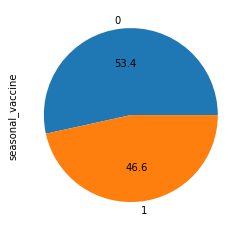

In [34]:
pd.value_counts(y).plot(kind="pie",autopct="%0.1f")
# Shows the percentage of persons taking seasonal_vaccine is 46.6%(i.e-1) and not taking is 53.4%(i.e-0)

<AxesSubplot:ylabel='h1n1_vaccine'>

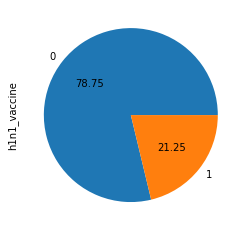

In [35]:
pd.value_counts(y1).plot(kind="pie",autopct="%0.2f")
# Shows the percentage of persons taking h1n1_vaccine is 21.25%(i.e-1) and not taking is 78.75%(i.e-0)

<AxesSubplot:xlabel='h1n1_concern'>

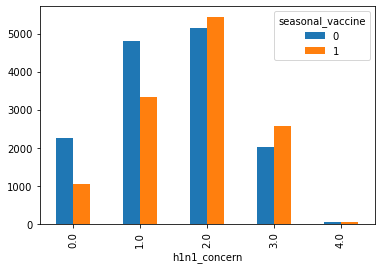

In [36]:
# Stacked Bar plot of h1n1concern and Seasonal_vaccine and h1n1_vaccine
pd.crosstab(X.h1n1_concern,y).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='h1n1_concern'>

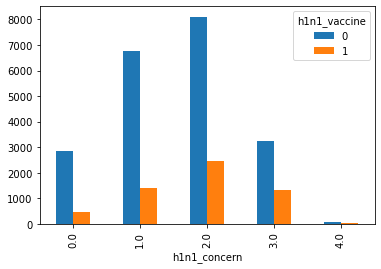

In [37]:
pd.crosstab(X.h1n1_concern,y1).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='h1n1_knowledge'>

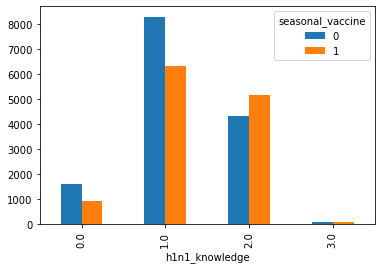

In [38]:
# Stacked Bar plot of h1n1_knowledge and Seasonal_vaccine and h1n1_vaccine
pd.crosstab(X.h1n1_knowledge,y).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='h1n1_knowledge'>

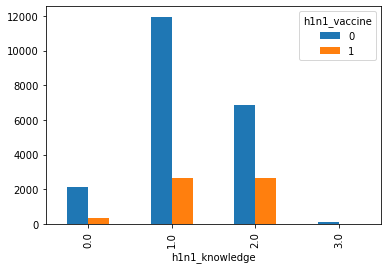

In [39]:
pd.crosstab(X.h1n1_knowledge,y1).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='doctor_recc_h1n1'>

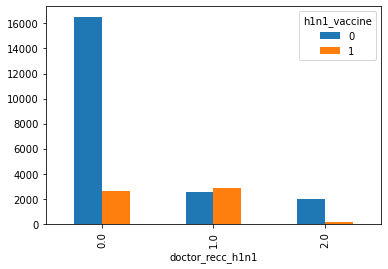

In [40]:
# Stacked Bar plot of doctor_recc_h1n1 and h1n1_vaccine
pd.crosstab(X.doctor_recc_h1n1,y1).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='doctor_recc_seasonal'>

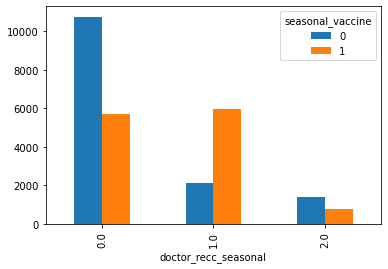

In [41]:
# Stacked Bar plot of doctor_recc_seasonal and Seasonal_vaccine 
pd.crosstab(X.doctor_recc_seasonal,y).plot(kind="bar",stacked=False)

# Logistic 

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logit=LogisticRegression(max_iter=3000)

In [35]:
logitmodel=logit.fit(X,y)

In [36]:
logitmodel.score(X,y)

0.7611487624967237

In [37]:
logitpredict=logitmodel.predict(X)

In [38]:
logitpredict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.73      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
print(cross_val_score(logit,X,y))

[0.75739423 0.759079   0.76427635 0.76671035 0.75360419]


In [43]:
(cross_val_score(logit,X,y)).mean()

0.7602128263160083

### N.B Gaussian

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
naiv=GaussianNB()

In [46]:
naivmodel=naiv.fit(X,y)

In [47]:
naivmodel.score(X,y)

0.7113116411427716

In [48]:
naivpredict=naivmodel.predict(X)

In [49]:
naivpredict

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
print(classification_report(y,naivpredict))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     14272
           1       0.68      0.73      0.70     12435

    accuracy                           0.71     26707
   macro avg       0.71      0.71      0.71     26707
weighted avg       0.71      0.71      0.71     26707



In [51]:
print(cross_val_score(naiv,X,y))

[0.69805316 0.71658555 0.71990264 0.71147725 0.70735817]


In [52]:
(cross_val_score(naiv,X,y)).mean()

0.7106753552251603

### N.B Categorical

In [53]:
from sklearn.naive_bayes import CategoricalNB

In [54]:
catnb=CategoricalNB()

In [55]:
catnbmodel=catnb.fit(X,y)

In [56]:
catnbmodel.score(X,y)

0.7545961732879021

In [57]:
catnbpredict=catnbmodel.predict(X)

In [58]:
print(classification_report(y,catnbpredict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     14272
           1       0.73      0.74      0.74     12435

    accuracy                           0.75     26707
   macro avg       0.75      0.75      0.75     26707
weighted avg       0.75      0.75      0.75     26707



In [59]:
print(cross_val_score(catnb,X,y))

[0.74934481 0.75514788 0.75454035 0.75641266 0.75023404]


In [60]:
(cross_val_score(catnb,X,y)).mean()

0.7531359485976648

#### h1n1 vac & seasonal vac logistic

In [61]:
y1=labels.h1n1_vaccine

In [62]:
logitmodel2=logit.fit(X,y1)

In [63]:
logitmodel2.score(X,y1)

0.8279102856928895

In [113]:
logitpredict2=logitmodel2.predict(X)

In [115]:
print(classification_report(y1,logitpredict2))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.37      0.48      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.66      0.69     26707
weighted avg       0.81      0.83      0.81     26707



In [64]:
logiseasonpredict=logitmodel.predict(vaccinetestdf)

In [65]:
logith1n1predict=logitmodel2.predict(vaccinetestdf)

In [66]:
pd.DataFrame(logiseasonpredict).to_csv("logitseasonNEW.csv")

In [67]:
pd.DataFrame(logith1n1predict).to_csv("logith1n1NEW.csv")

#### h1n1 vac & seasonal vac N.B Categorical

In [68]:
catnbmodel2=catnb.fit(X,y1)

In [69]:
catnbmodel2.score(X,y1)

0.8092260456060208

In [70]:
catnbseasonpredict=catnbmodel.predict(vaccinetestdf)

In [71]:
catnbh1n1predict=catnbmodel2.predict(vaccinetestdf)

In [72]:
pd.DataFrame(catnbseasonpredict).to_csv("catNBseasonNEW.csv")

In [73]:
pd.DataFrame(catnbh1n1predict).to_csv("catNBh1n1NEW.csv")

## Decission Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
Dtree=DecisionTreeClassifier(max_depth=13)

In [76]:
Dtreemodel=Dtree.fit(X,y)   # max_depth = 16

In [77]:
Dtreemodel.score(X,y)

0.8820908376081177

In [78]:
Dtreepredict=Dtreemodel.predict(X)

In [79]:
pd.crosstab(y,Dtreepredict)

col_0,0,1
seasonal_vaccine,,
0,12870,1402
1,1747,10688


In [80]:
print(classification_report(y,Dtreepredict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14272
           1       0.88      0.86      0.87     12435

    accuracy                           0.88     26707
   macro avg       0.88      0.88      0.88     26707
weighted avg       0.88      0.88      0.88     26707



In [81]:
print(cross_val_score(Dtree,X,y))

[0.72107825 0.73006365 0.72252387 0.73862573 0.71803033]


In [82]:
(cross_val_score(Dtree,X,y)).mean()

0.7272252450281306

In [83]:
Dtreemodel2=Dtree.fit(X,y1)    # max Depth = 13

In [84]:
Dtreemodel2.score(X,y1)

0.9233534279402403

In [85]:
Dtreepredict2=Dtreemodel2.predict(X)

In [86]:
print(classification_report(y,Dtreepredict2))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74     14272
           1       0.81      0.31      0.45     12435

    accuracy                           0.64     26707
   macro avg       0.71      0.62      0.59     26707
weighted avg       0.70      0.64      0.60     26707



In [87]:
(cross_val_score(Dtree,X,y1)).mean()

0.8130826491392604

In [88]:
Dtreepredictseason=Dtreemodel.predict(vaccinetestdf)

In [89]:
Dtreepredicth1n1=Dtreemodel2.predict(vaccinetestdf)

In [90]:
pd.DataFrame(Dtreepredictseason).to_csv("DtreeSeasonNEW.csv")

In [91]:
pd.DataFrame(Dtreepredicth1n1).to_csv("Dtreeh1n1NEW.csv")

#### feature selection fro DT

In [92]:
from sklearn.tree import export_graphviz

In [93]:
export_graphviz(Dtreemodel,feature_names=X.columns)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="opinion_h1n1_risk <= 2.5\\ngini = 0.335\\nsamples = 26707\\nvalue = [21033, 5674]"] ;\n1 [label="doctor_recc_h1n1 <= 0.5\\ngini = 0.233\\nsamples = 19175\\nvalue = [16596, 2579]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="opinion_h1n1_vacc_effective <= 3.5\\ngini = 0.166\\nsamples = 14979\\nvalue = [13610, 1369]"] ;\n1 -> 2 ;\n3 [label="health_insurance <= 1.5\\ngini = 0.125\\nsamples = 12044\\nvalue = [11236, 808]"] ;\n2 -> 3 ;\n4 [label="opinion_seas_risk <= 0.5\\ngini = 0.166\\nsamples = 6810\\nvalue = [6186, 624]"] ;\n3 -> 4 ;\n5 [label="employment_industry <= 5.5\\ngini = 0.093\\nsamples = 2259\\nvalue = [2149, 110]"] ;\n4 -> 5 ;\n6 [label="employment_industry <= 4.5\\ngini = 0.153\\nsamples = 395\\nvalue = [362, 33]"] ;\n5 -> 6 ;\n7 [label="behavioral_antiviral_meds <= 0.5\\ngini = 0.122\\nsamples = 382\\nvalue = [357, 25]"] ;\n6 -> 7 ;\n8 [label="

In [94]:
pd.DataFrame(X.columns,Dtreemodel.feature_importances_).reset_index().sort_values(ascending=False,by="index")

,index,0
16,0.156013,opinion_h1n1_risk
14,0.121662,health_insurance
9,0.091102,doctor_recc_h1n1
10,0.067413,doctor_recc_seasonal
15,0.057717,opinion_h1n1_vacc_effective
29,0.045954,hhs_geo_region
34,0.034946,employment_occupation
21,0.034785,age_group
33,0.031442,employment_industry
13,0.029708,health_worker


In [95]:
XFe=X.drop(['behavioral_antiviral_meds','child_under_6_months','behavioral_face_mask','behavioral_wash_hands','employment_status',
            'rent_or_own','chronic_med_condition','behavioral_avoidance','behavioral_large_gatherings',
          'marital_status','sex','behavioral_outside_home','behavioral_touch_face'],axis=1)

In [96]:
XFe.shape

(26707, 22)

In [97]:
DtreemodelXFe=Dtree.fit(XFe,y)

In [98]:
DtreemodelXFe.score(XFe,y)

0.8796570187591268

In [99]:
DtreemodelXFey1=Dtree.fit(XFe,y1)

In [100]:
DtreemodelXFey1.score(XFe,y1)

0.9180739132062755

In [101]:
DtreepredictXFe=DtreemodelXFe.predict(XFe)

In [102]:
print(classification_report(y,DtreepredictXFe))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74     14272
           1       0.82      0.30      0.44     12435

    accuracy                           0.64     26707
   macro avg       0.71      0.62      0.59     26707
weighted avg       0.70      0.64      0.60     26707



In [103]:
(cross_val_score(Dtree,XFe,y)).mean()

0.730145730936713

In [104]:
DtreepredictXFey1=DtreemodelXFey1.predict(XFe)

In [105]:
print(classification_report(y1,DtreepredictXFey1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     21033
           1       0.88      0.72      0.79      5674

    accuracy                           0.92     26707
   macro avg       0.90      0.84      0.87     26707
weighted avg       0.92      0.92      0.91     26707



In [106]:
(cross_val_score(Dtree,XFe,y1)).mean()

0.8107611757929499

# Random Forest

In [311]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
Rforest=RandomForestClassifier(n_estimators=2000)

In [313]:
Rforestmodel=Rforest.fit(X,y)

In [314]:
Rforestmodel.score(X,y)

1.0

In [315]:
Rforestpredict=Rforestmodel.predict(X)

In [316]:
print(classification_report(y,Rforestpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14272
           1       1.00      1.00      1.00     12435

    accuracy                           1.00     26707
   macro avg       1.00      1.00      1.00     26707
weighted avg       1.00      1.00      1.00     26707



In [317]:
(cross_val_score(Rforest,X,y)).mean()

0.7812186422489404

In [318]:
Rforestmodel2=Rforest.fit(X,y1)

In [319]:
Rforestmodel2.score(X,y1)

1.0

In [320]:
Rforestpredict2=Rforestmodel2.predict(X)

In [321]:
print(classification_report(y1,Rforestpredict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21033
           1       1.00      1.00      1.00      5674

    accuracy                           1.00     26707
   macro avg       1.00      1.00      1.00     26707
weighted avg       1.00      1.00      1.00     26707



In [322]:
(cross_val_score(Rforest,X,y1)).mean()

0.8531471782431439

In [323]:
Rforestpredictseason=Rforestmodel.predict(vaccinetestdf)

In [324]:
Rforestpredicth1n1=Rforestmodel2.predict(vaccinetestdf)

In [326]:
pd.DataFrame(Rforestpredictseason).to_csv("RforestseasonNEW.csv")

In [327]:
pd.DataFrame(Rforestpredicth1n1).to_csv("Rforesth1n1NEW.csv")

## Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
GBM=GradientBoostingClassifier(n_estimators=500)

In [113]:
GBMmodel=GBM.fit(X,y)

In [114]:
GBMmodel.score(X,y)

0.8085146216347774

In [115]:
GBMpredict=GBMmodel.predict(X)

In [116]:
print(classification_report(y,GBMpredict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     14272
           1       0.80      0.78      0.79     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



In [117]:
from sklearn.metrics import plot_roc_curve

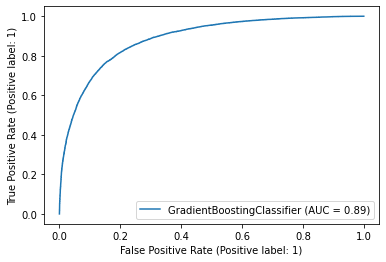

In [118]:
plot_roc_curve(GBM,X,y)

In [119]:
(cross_val_score(GBM,X,y)).mean()

0.7886325495269775

In [120]:
GBMmodel2=GBM.fit(X,y1)

In [121]:
GBMmodel2.score(X,y1)

0.8722057887445239

In [122]:
GBMpredict2=GBMmodel2.predict(X)

In [123]:
print(classification_report(y1,GBMpredict2))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     21033
           1       0.78      0.55      0.65      5674

    accuracy                           0.87     26707
   macro avg       0.84      0.76      0.78     26707
weighted avg       0.87      0.87      0.86     26707



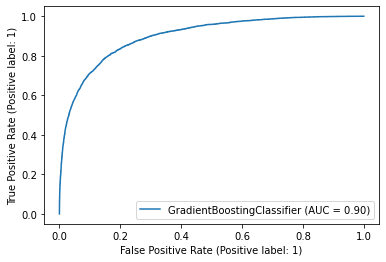

In [124]:
plot_roc_curve(GBM,X,y1)

In [125]:
(cross_val_score(GBM,X,y1)).mean()

0.8557305644943705

In [126]:
GBMseasonpredict=GBMmodel.predict(vaccinetestdf)

In [127]:
GBMh1n1predict=GBMmodel2.predict(vaccinetestdf)

In [128]:
pd.DataFrame(GBMseasonpredict).to_csv("GBMseason.csv")

In [129]:
pd.DataFrame(GBMh1n1predict).to_csv("GBMh1n1.csv")

# SVM

In [130]:
from sklearn.svm import SVC

In [131]:
SVM=SVC()

In [132]:
SVMmodel=SVM.fit(X,y)

In [133]:
SVMmodel.score(X,y)

0.7783352679072902

In [134]:
SVMpredict=SVMmodel.predict(X)

In [135]:
print(classification_report(y,SVMpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.77      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



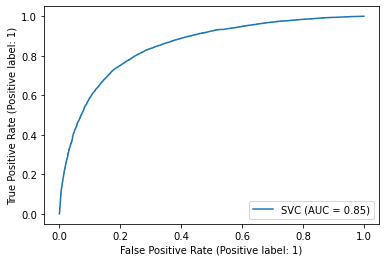

In [136]:
plot_roc_curve(SVM,X,y)

In [137]:
(cross_val_score(SVM,X,y)).mean()

0.7717081629638861

In [138]:
SVMmodel2=SVM.fit(X,y1)

In [139]:
SVMmodel2.score(X,y1)

0.8273860785561837

In [140]:
SVMpredict2=SVMmodel2.predict(X)

In [141]:
print(classification_report(y1,SVMpredict2))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     21033
           1       0.79      0.26      0.39      5674

    accuracy                           0.83     26707
   macro avg       0.81      0.62      0.64     26707
weighted avg       0.82      0.83      0.79     26707



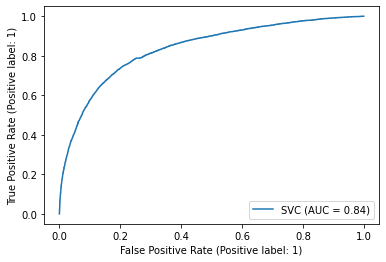

In [142]:
plot_roc_curve(SVM,X,y1)

In [143]:
(cross_val_score(SVM,X,y1)).mean()

0.822630812927495

In [144]:
SVMseasonpredict=SVMmodel.predict(vaccinetestdf)

In [145]:
SVMh1n1predict=SVMmodel2.predict(vaccinetestdf)

In [146]:
pd.DataFrame(SVMseasonpredict).to_csv("SVMseason.csv")

In [147]:
pd.DataFrame(SVMh1n1predict).to_csv("SVMh1n1.csv")